<p style="text-align: center;"><font size="8"><b>Random Numbers</b></font><br>

In scientific computing and statistics random numbers are very important. This lecture will cover some techniques to create random numbers and introduce some important algorithms that make use up random numbers.

# Random vs. Pseudo-random

There are things in nature which are truly random. For example: 
* atmospheric noise
* qunatum phenomena
* stock markets

A computer cannot directly create truly random numbers, however it can create sequences of numbers that appear random. These are known an *pseudo-random* numbers.

# Distributions



A series of pseudo-random numbers is typically determined by a fixed number known as a *seed*. Given the same seed value, the series of pseudo-random numbers is completely determined. 

For example, a common pseudo-random number generator is called the linear congruential generator (LCG), which uses the recurrence relation:

$$ X_{k+1} = \mod(aX_k + b, m),$$

where $a$, $b$ and $m$ are large integers. 

Common values of $a$, $b$ and $m$ are: $a=1664525$, $b=1013904223$ and $m = 2^{32}$.

Here is an implementation of an LCG:

In [37]:
def LCG(N, seed = 0, a=1664525, b=1013904223, m=2**32):
    """
    Return a sequence of uniform random numbers in interval [0,1]
    
    Parameters
    ----------
    N    : int
           number of random numbers
    seed : int
    a    : int
    b    : int
    m    : int
        
    Returns
    -------
    X : List
        a list of length N of uniform random numbers in [0,1]
    
    """
    
    # initialize list and compute first pseudo-random number from seed
    X = []
    X.append((a*seed + b) % m)
    
    # apply reccurence relation
    for i in range(N):
        X.append((a*X[i] + b) % m)
        
    # divide everything by m to get all numbers in the range [0,1]
    X = [r/m for r in X]
    
    return X

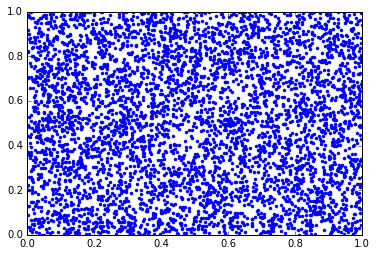

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

X = LCG(5000,1003)
Y = LCG(5000,2005)

plt.plot(X, Y,'.')


## Properties of LCG

What are some of the properties of this list of numbers?

* Periodicity: this sequence will eventually be periodic. The maximum period is $m$. It has a period of exactly $m$ if and only if: 
    * $m$ and $c$ are relatively prime
    * $a-1$ is divisible by all prime factors of $m$
    * $a-1$ is divisible by 4 if $m$ is divisible by 4  


* Randomness: we can think of each number as being drawn uniformly random from the interval [0,1]
* Defects: in addition to periodicity, in $n$ dimensional space, points will lie on at most $(n!m)^{1/n}$ hyperplanes

![3d lcg](images/lcg.gif)

# Random Library

NumPy implements a random number library under `numpy.random`. The `rand` function from this library returns a uniform random number on [0,1].

In [47]:
import numpy.random as rand

rand.rand()

0.14994116175836525

In [48]:
rand.rand()

0.9174291271122551

The random number generator used by NumPy is the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) algorithm. Like LCG this is a pseudorandom number from a seeded deterministic algorithm. The seed can be specified using the `random.seed` function.

In [53]:
rand.seed(1222)
rand.rand(4)

array([ 0.06748528,  0.33494299,  0.36839425,  0.48359485])

In [54]:
rand.seed(1222)
rand.rand(4)

array([ 0.06748528,  0.33494299,  0.36839425,  0.48359485])

# Monte Carlo Simulations

Probability theory lets us compute the probablility that a certain event happens. For example, we can compute the probability of rolling two consecutive ones a six sided dice:
$$ P(\text{two consecutive ones}) = P(\text{one})\times P(\text{one}) = \frac{1}{6}\times\frac{1}{6} = \frac{1}{36}$$

We can use more complicated rules to compute things like the probability of rolling at least two ones in a five run stretch. Unfortunately, these calculations can become tedious or impossible if the problem becomes too complicated. 

Monte Carolo simulations are a simple numerical way to compute probablilities. 

Assume we are performing $N$ experiments where the outcome of each one is random. Some event $A$ takes place $M$ times in these $N$ experiments. We can estimate the probability of the event as:
$$ P(A) \approx \frac{M}{N}.$$

This estimate becomes more accurate as $N$ increases and approaches the actual probability as $N\to\infty$. This is known as a Monte Carlo simulation. Monte Carlo methods were developped in the 1940s to help with the nuclear weapons research. They have since found uses throughout science and engineering. 

## Example: Throwing Dice

We'll return to our example from earlier. What is the probability of rolling two consecutive ones on a six sided dice? We know this should be $1/36$.

In [110]:
# set N - the number of times we roll 2 dice
N = 1000

# initialize M to 0
M = 0

# we know actual probability
p_act = 1.0/36

for i in range(N):
    
    r1 = rand.randint(1,7)
    r2 = rand.randint(1,7)
    
    if (r1 == 1 and r2 == 1):
        M += 1

print("Actual P:", p_act)
print("Simulated P:", M/N)
print("Simulation error:", abs(p_act - M/N))

Actual P: 0.027777777777777776
Simulated P: 0.033
Simulation error: 0.005222222222222225


Let's try for various values of $N$:

[0.0, 0.04, 0.026, 0.0257, 0.02772]


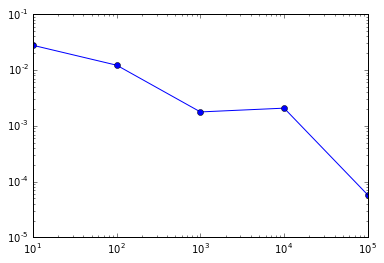

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt

N = [10, 100, 1000, 10000, 100000]
P = []
P_err = []

# we know actual probability
p_act = 1.0/36

for n in N:
    M = 0

    for i in range(n):
    
        r1 = rand.randint(1,7)
        r2 = rand.randint(1,7)
    
        if (r1 == 1 and r2 == 1):
            M += 1
            
    P.append(M / n)
    P_err.append(abs(p_act - M / n))
    
print(P)
plt.loglog(N,P_err, '-o')

What is the probability of rolling at least two ones in fives throws?

In [109]:
# set N - the number of times we roll 2 dice
N = 1000

# initialize M to 0
M = 0

for i in range(N):
    
    n_ones = 0
    
    # roll 6 dice
    for roll in range(5):
        
        r = rand.randint(1,7)
        
        # check if you rolled a one
        if r == 1:
            n_ones += 1
      
    # if you rolled at least 2 ones, mark trial as success
    if n_ones >= 2:
        M += 1

print("Simulated P:", M/N)

Simulated P: 0.181
